In [1]:
# Alexis Perumal, 2/3/20, HW #10

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import and_

In [32]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [33]:
from sqlalchemy import inspect
insp = inspect(engine)
insp.get_table_names()

['measurement', 'station']

In [153]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [35]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [197]:
# import inspect
# inspect.getmembers(Measurement)

In [198]:
# inspect.getmembers(Station)

In [40]:
# From the SQLLite file...

# Station Table:
#     id INTEGER NOT NULL, 
# 	station TEXT, 
# 	name TEXT, 
# 	latitude FLOAT, 
# 	longitude FLOAT, 
# 	elevation FLOAT, 
# 	PRIMARY KEY (id)
    
# Measurement Table:
#     id INTEGER NOT NULL, 
# 	station TEXT, 
# 	date TEXT, 
# 	prcp FLOAT, 
# 	tobs FLOAT, 
# 	PRIMARY KEY (id)
    

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

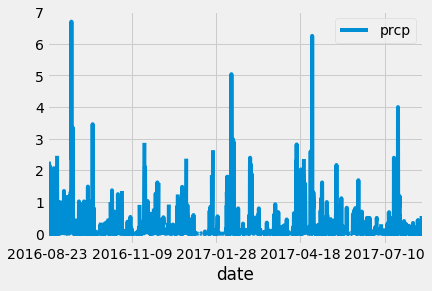

In [43]:
# Perform a query to retrieve the data and precipitation scores
# Assignment:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# prcp_df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
#                        filter(Measurement.date>='2016-08-23').group_by(Measurement.date))
prcp_1y_df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
                       filter(Measurement.date>='2016-08-23'))
prcp_1y_df = prcp_1y_df.set_index('date').sort_index()
prcp_1y_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_1y_df.plot()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_1y_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
# Design a query to show how many stations are available in this dataset?



In [45]:
# Design a query to show how many stations are available in this dataset?
# measure_stn_df = pd.DataFrame(session.query(Measurement.station).distinct().all())
# measure_stn_df
session.query(Measurement.station).distinct().count()

9

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
session.query(Measurement.station, func.count(Measurement.station)).filter(Measurement.tobs.isnot(None)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


[(54.0, 85.0, 71.66378066378067)]

In [47]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

![precipitation](Images/station-histogram.png)

In [52]:
stn_df = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=='USC00519281').order_by(Measurement.date).all())
stn_df.tail()


,date,tobs
2767,2017-08-14,77.0
2768,2017-08-15,77.0
2769,2017-08-16,76.0
2770,2017-08-17,76.0
2771,2017-08-18,79.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dba8a90>]],
      dtype=object)

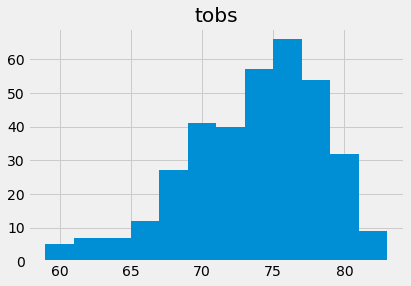

In [63]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stn_df = pd.DataFrame(session.query(Measurement.tobs).filter(and_(Measurement.date>='2016-08-18', Measurement.date<='2017-08-18', Measurement.station=='USC00519281')).all())
stn_df.hist(bins=12)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


In [66]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-12-25', '2017-01-01'))

[(62.0, 71.36734693877551, 78.0)]


<IPython.core.display.Javascript object>


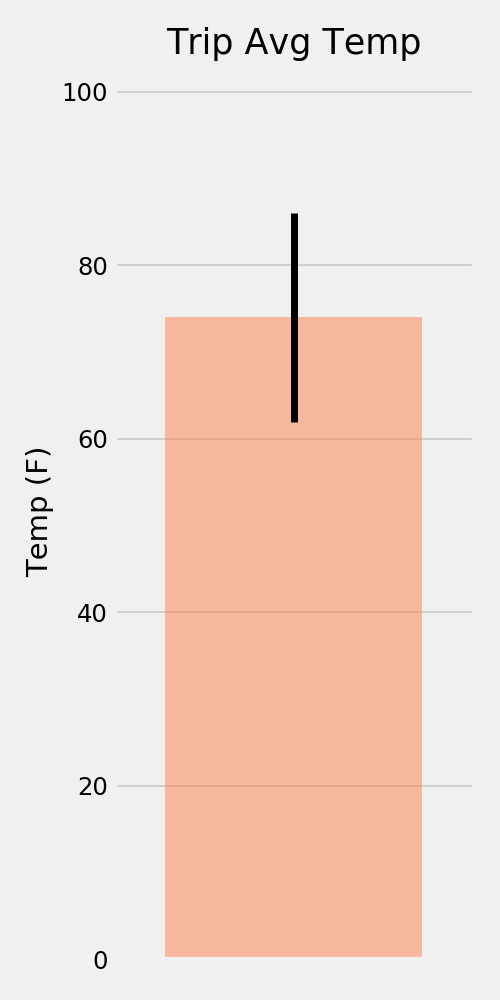

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


t_min=62.0, t_avg=71.36734693877551, t_max=78.0


<BarContainer object of 1 artists>

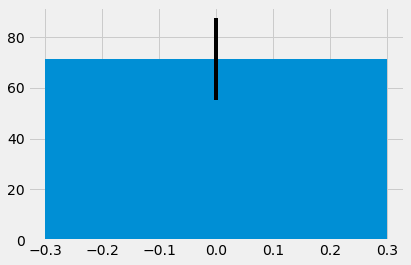

In [78]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
t_min, t_avg, t_max = calc_temps('2016-12-25', '2017-01-01')[0]
print(f"t_min={t_min}, t_avg={t_avg}, t_max={t_max}")
plt.bar(x=0, height=t_avg, width=0.6, yerr=(t_max-t_min))

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


In [103]:
results = session.query(Measurement.date, Measurement.station, func.sum(Measurement.prcp)).filter(and_(Measurement.date>='2016-12-25', Measurement.date<='2017-01-01')).group_by(Measurement.station).all()

full_results = []

for date, station, prcp in results:
    stn_name, stn_lat, stn_long, stn_elevation = session.query(Station.name, Station.latitude, Station.longitude, Station.elevation).filter(Station.station == station).all()[0]
    full_results.append((station, stn_name, stn_lat, stn_long, stn_elevation, prcp))
    
    
full_results

[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.71),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.2400000000000002),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  6.470000000000001),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.47),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.21000000000000002),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.24)]

## Optional Challenge Assignment

In [104]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [124]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = dt.datetime.strptime('2017-12-25', '%Y-%m-%d')
end_date = dt.datetime.strptime('2018-01-01', '%Y-%m-%d')


# Use the start and end date to create a range of dates
delta_days = (end_date - start_date).days

dates = [start_date + dt.timedelta(days=x) for x in range(delta_days+1)]
dates

# dates[0].strftime("%m-%d")

# Stip off the year and save a list of %m-%d strings
date_strings = [date.strftime("%m-%d") for date in dates]
date_strings

# Loop through the list of %m-%d strings and calculate the normals for each date
[daily_normals(date_str) for date_str in date_strings]


[[(60.0, 71.75, 79.0)],
 [(63.0, 71.44680851063829, 77.0)],
 [(62.0, 71.91666666666667, 79.0)],
 [(62.0, 70.52083333333333, 77.0)],
 [(57.0, 70.29166666666667, 78.0)],
 [(63.0, 69.86363636363636, 76.0)],
 [(56.0, 68.27906976744185, 77.0)],
 [(62.0, 69.15384615384616, 77.0)]]

In [146]:
# daily_norms_df = pd.DataFrame([daily_normals(date_str) for date_str in date_strings])
# tmin_list = []
# tavg_list = []
# tmax_list = []
# for date_str in date_strings:
#     tmin, tavg, tmax = daily_normals(date_str)
#     tmin_list.append(tmin)
#     tavg_list.append(tavg)
#     tmax_list.append(tmax)

daily_stats = [daily_normals(date_str) for date_str in date_strings]

data = {}
i = 0
for row in daily_stats:
    data[date_strings[i]] = list(*row)
    i+=1
    
data

daily_norms_df = pd.DataFrame.from_dict(data, orient='index', columns=['tmin', 'tavg', 'tmax'])
daily_norms_df.index.name = 'date'
daily_norms_df

,tmin,tavg,tmax
date,,,
12-25,60.0,71.750000,79.0
12-26,63.0,71.446809,77.0
12-27,62.0,71.916667,79.0
12-28,62.0,70.520833,77.0
12-29,57.0,70.291667,78.0
12-30,63.0,69.863636,76.0
12-31,56.0,68.279070,77.0
01-01,62.0,69.153846,77.0


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


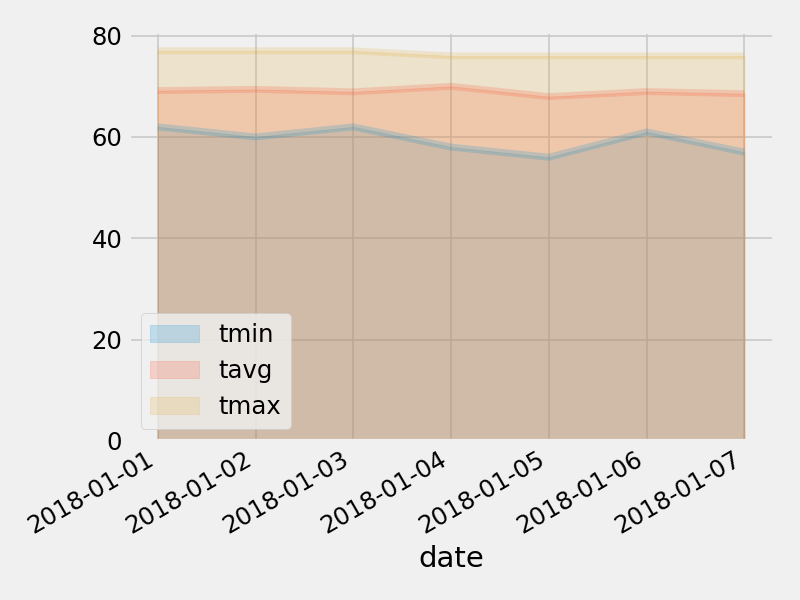

In [23]:
# Plot the daily normals as an area plot with `stacked=False`


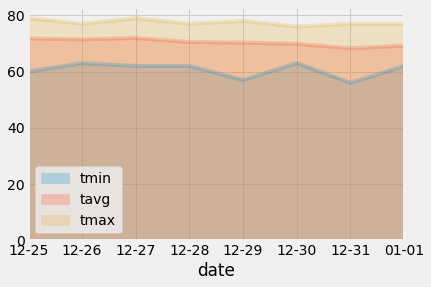

In [152]:
daily_norms_df.plot.area(stacked=False, alpha=0.25)

# Scratchpad to build Flask Functions

In [158]:
# Percipritation data query to be dropped into the flask app.
prcp_data = {}
for date, prcp in session.query(Measurement.date, Measurement.prcp).all():
    # print(f"{date}, {prcp}")
    prcp_data[date] = prcp
    
prcp_data

{'2010-01-01': 0.14,
 '2010-01-02': 0.0,
 '2010-01-03': 0.0,
 '2010-01-04': 0.0,
 '2010-01-06': 0.36,
 '2010-01-07': 0.3,
 '2010-01-08': 0.0,
 '2010-01-09': 0.0,
 '2010-01-10': 0.01,
 '2010-01-11': 0.14,
 '2010-01-12': 0.0,
 '2010-01-14': 0.0,
 '2010-01-15': 0.0,
 '2010-01-16': 0.0,
 '2010-01-17': 0.0,
 '2010-01-18': 0.0,
 '2010-01-19': 0.0,
 '2010-01-20': 0.0,
 '2010-01-21': 0.32,
 '2010-01-22': 0.0,
 '2010-01-23': 0.0,
 '2010-01-24': 0.01,
 '2010-01-25': 0.0,
 '2010-01-26': 0.03,
 '2010-01-27': 0.31,
 '2010-01-28': 0.07,
 '2010-01-30': 0.33,
 '2010-01-31': 1.1,
 '2010-02-01': 0.01,
 '2010-02-03': 0.67,
 '2010-02-04': 0.0,
 '2010-02-05': 0.09,
 '2010-02-06': 0.04,
 '2010-02-07': 0.0,
 '2010-02-08': 0.0,
 '2010-02-09': 0.0,
 '2010-02-11': 0.0,
 '2010-02-12': 0.65,
 '2010-02-13': 0.62,
 '2010-02-14': 0.02,
 '2010-02-15': 0.0,
 '2010-02-16': 0.0,
 '2010-02-17': 0.02,
 '2010-02-19': 0.42,
 '2010-02-20': 0.55,
 '2010-02-21': 0.0,
 '2010-02-22': None,
 '2010-02-23': 0.0,
 '2010-02-24': 0.0,

In [161]:
# Station data query to be dropped into the flask app.
# Assignment:
# Convert the query results to a Dictionary using date as the key and prcp as the value.
# Return the JSON representation of your dictionary.

session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [192]:
# TOBS (temperature) data query to be dropped into the flask app.
# Assignment:
# query for the dates and temperature observations from a year from the last data point.
# Return a JSON list of Temperature Observations (tobs) for the previous year.

temp_data = {}
for date, temp in session.query(Measurement.date, Measurement.tobs).all():
    # print(f"{date}, {prcp}")
    temp_data[date] = temp
    
temp_data

{'2010-01-01': 73.0,
 '2010-01-02': 61.0,
 '2010-01-03': 76.0,
 '2010-01-04': 72.0,
 '2010-01-06': 71.0,
 '2010-01-07': 74.0,
 '2010-01-08': 64.0,
 '2010-01-09': 67.0,
 '2010-01-10': 71.0,
 '2010-01-11': 68.0,
 '2010-01-12': 68.0,
 '2010-01-14': 69.0,
 '2010-01-15': 67.0,
 '2010-01-16': 65.0,
 '2010-01-17': 70.0,
 '2010-01-18': 76.0,
 '2010-01-19': 75.0,
 '2010-01-20': 69.0,
 '2010-01-21': 71.0,
 '2010-01-22': 63.0,
 '2010-01-23': 75.0,
 '2010-01-24': 76.0,
 '2010-01-25': 65.0,
 '2010-01-26': 69.0,
 '2010-01-27': 65.0,
 '2010-01-28': 71.0,
 '2010-01-30': 69.0,
 '2010-01-31': 74.0,
 '2010-02-01': 65.0,
 '2010-02-03': 63.0,
 '2010-02-04': 70.0,
 '2010-02-05': 66.0,
 '2010-02-06': 62.0,
 '2010-02-07': 69.0,
 '2010-02-08': 69.0,
 '2010-02-09': 72.0,
 '2010-02-11': 69.0,
 '2010-02-12': 66.0,
 '2010-02-13': 70.0,
 '2010-02-14': 73.0,
 '2010-02-15': 73.0,
 '2010-02-16': 74.0,
 '2010-02-17': 69.0,
 '2010-02-19': 60.0,
 '2010-02-20': 74.0,
 '2010-02-21': 68.0,
 '2010-02-22': 62.0,
 '2010-02-23'

In [193]:
max_date = session.query(func.max(Measurement.date)).all()[0][0]
print(max_date)
start_date = str(int(max_date[:4])-1) + max_date[4:]
print(start_date)


2017-08-23
2016-08-23


'2017-08-23'

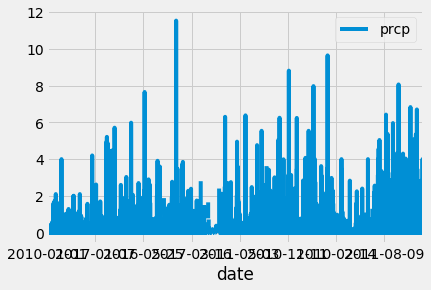

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# prcp_df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).group_by(Measurement.date).all())
# prcp_df.plot(x='date')

prcp_df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).all())
prcp_df.plot(x='date')

# Calculate the date 1 year ago from the last data point in the database
prcp_df['date'].max()




In [195]:
tobs_data = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.date>=start_date).order_by(Measurement.date).all()
tobs_data

[('2016-08-23', 'USC00519397', 81.0),
 ('2016-08-23', 'USC00513117', 76.0),
 ('2016-08-23', 'USC00514830', 80.0),
 ('2016-08-23', 'USC00517948', 80.0),
 ('2016-08-23', 'USC00519523', 80.0),
 ('2016-08-23', 'USC00519281', 77.0),
 ('2016-08-23', 'USC00516128', 74.0),
 ('2016-08-24', 'USC00519397', 79.0),
 ('2016-08-24', 'USC00513117', 76.0),
 ('2016-08-24', 'USC00514830', 80.0),
 ('2016-08-24', 'USC00517948', 78.0),
 ('2016-08-24', 'USC00519523', 79.0),
 ('2016-08-24', 'USC00519281', 77.0),
 ('2016-08-24', 'USC00516128', 74.0),
 ('2016-08-25', 'USC00519397', 80.0),
 ('2016-08-25', 'USC00513117', 77.0),
 ('2016-08-25', 'USC00514830', 81.0),
 ('2016-08-25', 'USC00517948', 81.0),
 ('2016-08-25', 'USC00519523', 80.0),
 ('2016-08-25', 'USC00519281', 80.0),
 ('2016-08-25', 'USC00516128', 77.0),
 ('2016-08-26', 'USC00519397', 79.0),
 ('2016-08-26', 'USC00513117', 78.0),
 ('2016-08-26', 'USC00514830', 81.0),
 ('2016-08-26', 'USC00517948', 81.0),
 ('2016-08-26', 'USC00519523', 84.0),
 ('2016-08-2

In [213]:
#     Return a JSON list of the minimum temperature, the average temperature, and the
#     max temperature for a given start or start-end range. When given the start only,
#     calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
start_date = '2015-01-01'
print(start_date)
results = session.query(Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        group_by(Measurement.date).filter(Measurement.date >= start_date).all()
results

2015-01-01


[('2015-01-01', 63.0, 66.28571428571429, 71.0),
 ('2015-01-02', 60.0, 65.0, 72.0),
 ('2015-01-03', 62.0, 66.42857142857143, 72.0),
 ('2015-01-04', 58.0, 64.71428571428571, 72.0),
 ('2015-01-05', 56.0, 60.125, 73.0),
 ('2015-01-06', 63.0, 66.375, 72.0),
 ('2015-01-07', 57.0, 65.875, 70.0),
 ('2015-01-08', 57.0, 65.25, 74.0),
 ('2015-01-09', 62.0, 66.875, 75.0),
 ('2015-01-10', 65.0, 70.2, 77.0),
 ('2015-01-11', 61.0, 67.57142857142857, 75.0),
 ('2015-01-12', 60.0, 65.0, 73.0),
 ('2015-01-13', 58.0, 65.25, 72.0),
 ('2015-01-14', 63.0, 68.0, 72.0),
 ('2015-01-15', 65.0, 71.625, 75.0),
 ('2015-01-16', 68.0, 70.5, 74.0),
 ('2015-01-17', 66.0, 70.28571428571429, 74.0),
 ('2015-01-18', 63.0, 67.83333333333333, 74.0),
 ('2015-01-19', 63.0, 68.85714285714286, 77.0),
 ('2015-01-20', 64.0, 68.0, 77.0),
 ('2015-01-21', 61.0, 65.125, 71.0),
 ('2015-01-22', 61.0, 66.5, 75.0),
 ('2015-01-23', 67.0, 71.875, 79.0),
 ('2015-01-24', 66.0, 68.57142857142857, 72.0),
 ('2015-01-25', 64.0, 66.5, 68.0),
 ('20

In [204]:
results2 = session.query(Measurement.date, Measurement.prcp).\
                       filter(Measurement.date>='2016-08-23').all()
results2

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'